In [ ]:
local_path = './'

"""## Prepare fastai"""
from fastai import *
from fastai.text import *
from fastai.metrics import *
torch.cuda.set_device(0)

"""## Prepare Dataset"""
local_project_path = local_path + 'bp_deepred/'
if not os.path.exists(local_project_path):
    os.makedirs(local_project_path)
print('local_project_path:', local_project_path)

"""## Create Language Model"""
class dna_tokenizer(BaseTokenizer):
    def tokenizer(slef, t):
        return list(t)
tokenizer = Tokenizer(tok_func=dna_tokenizer, pre_rules=[], post_rules=[], special_cases=[])
processor = [TokenizeProcessor(tokenizer=tokenizer, include_bos= True, include_eos=True), NumericalizeProcessor(max_vocab=30000)]

In [ ]:
# batch size
bs = 512
data_lm = TextLMDataBunch.from_csv(local_project_path, 'combined.csv',
                                   text_cols ='seq', valid_pct= 0.1, tokenizer=tokenizer,
                                   include_bos= True, include_eos=True, bs=bs)
print('data_cls Training set size', len(data_lm.train_ds))
print('data_cls Validation set size', len(data_lm.valid_ds))

In [ ]:
data_lm.show_batch()

In [ ]:
data_lm.vocab.itos

In [ ]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3, pretrained=False).to_fp16()

In [ ]:
learn_lm.data = data_lm

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


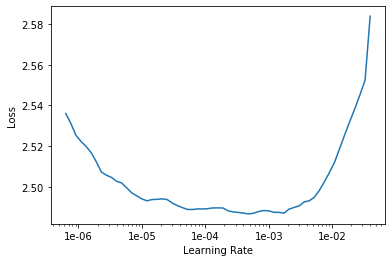

In [28]:
learn_lm.lr_find()
learn_lm.recorder.plot(skip_end = 15)

In [ ]:
learn_lm.fit_one_cycle(1, 1e-2/2.6**1, moms=(0.8,0.7))

In [ ]:
learn_lm.unfreeze()

In [ ]:
lr=0.01
learn_lm.fit_one_cycle(1, slice(lr), moms=(0.8,0.7))

In [ ]:
learn_lm.fit_one_cycle(1, slice(1e-2), moms=(0.8,0.7))

In [23]:
learn_lm.validate(metrics=[accuracy])

[2.563429, tensor(0.2102)]

In [25]:
learn_lm.save('lm-v1-acc21')

In [26]:
learn_lm.fit_one_cycle(1, slice(1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.526900,2.512330,0.226499,18:56


In [27]:
learn_lm.save('lm-v1-loss2.52')

In [ ]:
learn_lm.fit_one_cycle(1, slice(1e-2), moms=(0.8,0.7))

In [30]:
learn_lm.validate(metrics=[accuracy])

[2.4681342, tensor(0.2404)]

In [31]:
learn_lm.save('lm-v1-loss2.46')